In [1]:
import pandas as pd
import numpy as np
import os, sys, subprocess,time
from osgeo import gdal
import geopandas as gpd
from pyproj import CRS
from shapely.ops import unary_union, polygonize
from rtree import index
from shapely.geometry import Polygon
from sklearn.cluster import DBSCAN
import rasterio
#import rasterstats as rs
import glob
from shapely.affinity import rotate
from shapely.geometry import LineString, Point, MultiPolygon,MultiLineString 
from shapely.ops import unary_union, polygonize
from geopandas import overlay
import shapely.wkt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = gpd.read_file("D:\\lila visuals\\osm_powline_11.776643009779821_10.743913945502888_80.19273383153288_79.14689901832789-line.shp")

In [3]:
df = df.to_crs(epsg = 4326)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cables      192 non-null    object  
 1   power       196 non-null    object  
 2   voltage     191 non-null    object  
 3   note        2 non-null      object  
 4   building    0 non-null      object  
 5   operator    0 non-null      object  
 6   substation  0 non-null      object  
 7   frequency   0 non-null      object  
 8   location    0 non-null      object  
 9   generator_  0 non-null      object  
 10  name        0 non-null      object  
 11  plant_meth  0 non-null      object  
 12  plant_outp  0 non-null      object  
 13  plant_sour  0 non-null      object  
 14  plant_type  0 non-null      object  
 15  source      0 non-null      object  
 16  alt_name    0 non-null      object  
 17  landuse     0 non-null      object  
 18  wikidata    0 non-null      object  
 19  

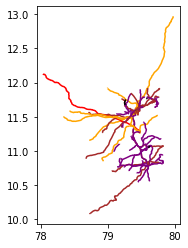

In [4]:
df.plot(color = df["color"])
plt.show()

In [5]:
df1 = gpd.read_file("D:\\LILA\\Nagapattinam_proj32644.shp")
df1 = df1.to_crs(epsg =4326)
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        1 non-null      float64 
 1   PERIMETER   1 non-null      float64 
 2   DISTRICT_   1 non-null      int64   
 3   DISTRICT_I  1 non-null      int64   
 4   DCODE       1 non-null      object  
 5   DISTRICT    1 non-null      object  
 6   SCODE       1 non-null      object  
 7   STATE       1 non-null      object  
 8   SDCODE      1 non-null      object  
 9   AREAHA      1 non-null      float64 
 10  geometry    1 non-null      geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 216.0+ bytes


In [6]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        1 non-null      float64 
 1   PERIMETER   1 non-null      float64 
 2   DISTRICT_   1 non-null      int64   
 3   DISTRICT_I  1 non-null      int64   
 4   DCODE       1 non-null      object  
 5   DISTRICT    1 non-null      object  
 6   SCODE       1 non-null      object  
 7   STATE       1 non-null      object  
 8   SDCODE      1 non-null      object  
 9   AREAHA      1 non-null      float64 
 10  geometry    1 non-null      geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 216.0+ bytes


In [7]:

merge = overlay(df, df1, how='intersection')
# merge.plot(legend ="True",color = merge["color"])
merge = merge.to_crs(epsg =4326)
merge.info()
# merge.plot(legend ="True",color = merge["color"])

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cables      25 non-null     object  
 1   power       25 non-null     object  
 2   voltage     24 non-null     object  
 3   note        0 non-null      object  
 4   building    0 non-null      object  
 5   operator    0 non-null      object  
 6   substation  0 non-null      object  
 7   frequency   0 non-null      object  
 8   location    0 non-null      object  
 9   generator_  0 non-null      object  
 10  name        0 non-null      object  
 11  plant_meth  0 non-null      object  
 12  plant_outp  0 non-null      object  
 13  plant_sour  0 non-null      object  
 14  plant_type  0 non-null      object  
 15  source      0 non-null      object  
 16  alt_name    0 non-null      object  
 17  landuse     0 non-null      object  
 18  wikidata    0 non-null      object  
 19  ba

In [8]:
df2 = gpd.read_file("D:\\lila visuals\\list_substation_TN_corr.shp")
df2 = df2.to_crs(epsg = 4326)
intersection = overlay(df2, df1, how='intersection')

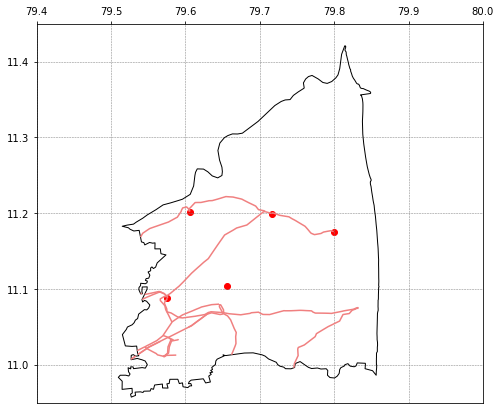

In [9]:
ax = df1.plot(figsize=(8,8),color="none",zorder=2)
x =merge.plot(color="lightcoral",ax =ax)
y = intersection.plot(color="red",ax=ax)
ax.xaxis.tick_top()
plt.xlim(79.40,80.00)
plt.ylim(10.95,11.45)
plt.grid(color="grey",linestyle = '--', linewidth = 0.5)
# plt.legend()
plt.savefig("output.jpg")
plt.show()

In [10]:
intersection.head()

,Name of th,Voltage ra,Capacity i,Date of Co,AREA,PERIMETER,DISTRICT_,DISTRICT_I,DCODE,DISTRICT,SCODE,STATE,SDCODE,AREAHA,geometry
0,Kadalangudy,110/11,1x16,25.01.02,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.57505 11.08840)
1,Manalmedu,110/33-11,"1x10, 2X10",17.02.88,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.60593 11.20177)
2,Mayiladuthurai,110/33-11,"1x10+1X16, 2x16",07.10.79,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.65633 11.10438)
3,Thiruvengadu,110/11,1x10,31.03.03,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.79977 11.17567)
4,Vaitheeswarankoil,110/33-11,1x16+1x16,14.12.01,1.199284e+09,206966.913791,983,977,19,Nagapattinam,33,Tamil Nadu,3319,119928.431631,POINT (79.71628 11.19915)


In [11]:
data1 = "D:\\lila visuals\\GHI_Nagapattinam.tif"
data2 = "D:\\lila visuals\\GHI_Nagapattinam - Copy.tif"

In [12]:
# df = pd.DataFrame()   
# for j in range(len(df1)):  #df1 is nagapattinam district shape file 
#     input_shp = "D:\\lila visuals\\new.shp"

#     selection = df1.geometry[j:j+1]
#     if selection.geometry.is_empty.bool():
#         rasterarr = []
#     else:
#         selection.to_file(input_shp)
            
#         #first for LandUse raster 
#         input_raster= data1
    
#         output_raster = data2
            
#     ds = gdal.Warp(data2,
#                           data1,
#                           format = 'GTiff',
#                           cutlineDSName = input_shp,
#                           cropToCutline=True,
#                           )
#     ds = None
            
#     raster = gdal.Open(data2, gdal.GA_ReadOnly)
#     lcarr = raster.ReadAsArray()
#             #remove nodata values
#     lcarrorig = lcarr.reshape(lcarr.size,1)
#     lcarrND = lcarr[lcarr!=-9999]

#     if (np.size(lcarrND)==0):
#                df.at[j, "ToTVegPix"]=0
#                df.at[j, "ToTPix"]=0
#                df.at[j, "ToTVegAr%"]=0
       
               
#     else:    
                
                  
#         veg_sum = len(lcarrND[(lcarrND==3)])
               
                
               
#         df.at[j, "ToTVegPix"]=veg_sum
#         df.at[j, "ToTPix"]=np.size(lcarrorig)
#         df.at[j, "ToTVegAr%"]=100*veg_sum/(np.size(10))
                        
       
                   
# df1 = pd.concat([df1, df], axis = 1)
    
    
# geometry = df1["geometry"].astype(str).map(shapely.wkt.loads) 

# df1 = gpd.GeoDataFrame(df1, crs="EPSG:"+str(4326), geometry=geometry)
    
    
    
    # df2 = df2.to_crs(epsg=4326)

In [13]:



# input_shp = gpd.read_file("D:\\lila visuals\\new.shp")

In [14]:
# input_shp = input_shp.to_crs(epsg =4326)
# input_shp.info()

In [15]:
# input_shp.plot(cmap="Accent_r")

<AxesSubplot:>

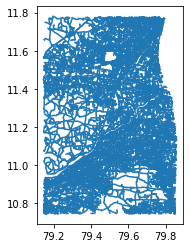

In [16]:
data = gpd.read_file("D:\\lila visuals\\edges.shp")
data = data.to_crs(epsg =4326)
data.plot()

In [17]:
merge_data = overlay(data,df1,how ="intersection")


<AxesSubplot:>

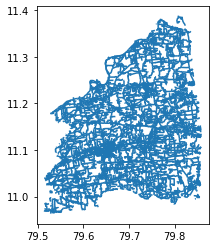

In [18]:
merge_data.plot()

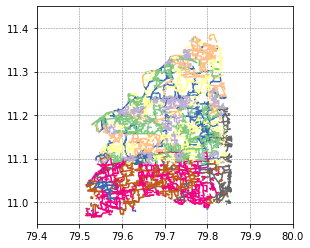

In [19]:
merge_data.plot(cmap="Accent_r")
plt.xlim(79.40,80.00)
plt.ylim(10.95,11.45)
plt.grid(color="grey",linestyle = '--', linewidth = 0.5)
# plt.legend()
# plt.savefig("output.jpg")
plt.show()

In [20]:
new = pd.read_csv("D:\\lila visuals\\area_stats.csv")

In [21]:
new.head()

,Unnamed: 0,folder,total_area_sqkm,total_area_hectare,total_area_acres,areaA_5_20acres,areaB_20_100acres,areaC_>100acres,areaD_other,Totpolys_A_5_20acres,Totpolys_B_20_100acres,Totpolys_C_>_100acres,Totpolys_D_other
0,0,_rl_elev_rd_wat_trans_ar_sub_rdpx_trsub_med,11.207072,1120.707219,2769.323572,12.373200,1391.648791,1362.596784,2.704798,1,42,7,1
1,0,_rl_elev_rd_wat_co_trans_ar_sub_rdpx_trsub_med,10.358355,1035.835524,2559.601371,12.373200,1415.779973,1129.796768,1.651430,1,42,5,1
2,0,_rl_elev_rd_wat_trans_ar_sub_rdpx_trsub_fin_tr...,3.751637,375.163683,927.048218,0.000000,0.000000,927.048218,0.000000,0,0,4,0
3,0,_rl_elev_rd_wat_trans_ar_sub_rdpx_trsub_low,27.659016,2765.901617,6834.681190,2940.775304,2294.477899,1592.431195,6.996791,315,67,9,2
4,0,_rl_elev_rd_wat_trans_ar_sub_rdpx_trsub_trat_s...,3.751637,375.163683,927.048218,0.000000,0.000000,927.048218,0.000000,0,0,4,0
